 ```
                                                                    .___ ______________________  _________________
                                                                    |   |\__    ___/\_   _____/ /   _____/\_____  \
                                                                    |   |  |    |    |    __)_  \_____  \  /   |   \
                                                                    |   |  |    |    |        \ /        \/    |    \
                                                                    |___|  |____|   /_______  //_______  /\_______  /
                                                                                            \/         \/         \/
```
<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://pbs.twimg.com/profile_images/1543728120066215936/kZrRvZC9_400x400.jpg" height ="50"><center>
<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>EJERCICIO_ESCALAMIENTO_DATOS</center></b></font>

<b><font back = "Times New Roman" size = "4"><center>Parcial 3 </center></font>

<div align="right"><font face = "Times New Roman" size = "2">Mtro. Miguel Tlapa Juarez (migueltlapa@iteso.mx)</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Sofía Vanessa Noyola Fonseca (sofia.noyola@iteso.mx)</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Sebastian Garcia-Moreno Zinchenko (zinchenko@iteso.mx)</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Francsico Javier Ramos Jimenez(javier.ramos@iteso.mx)</font></div>


</span></div>

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df_original = pd.read_csv("../retail_store_inventory.csv")
df = df_original.copy()

In [137]:
df.shape

(73100, 15)

In [138]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,01/01/2022,S001,P0001,Groceries,North,231,127.0,55.0,135.47,33.50,20,Rainy,0,29.69,Autumn
1,01/01/2022,S001,P0002,Toys,South,204,150.0,66.0,144.04,63.01,20,NaN,0,66.16,Autumn
2,01/01/2022,S001,P0003,Toys,West,102,65.0,51.0,74.02,27.99,10,Sunny,1,31.32,Summer
3,01/01/2022,S001,P0004,Toys,North,469,61.0,164.0,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,01/01/2022,S001,P0005,Electronics,East,166,14.0,135.0,9.26,73.64,0,Sunny,0,68.95,Summer


In [139]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

#### Valores únicos de cada columna

In [140]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("-"*80)

Date
['01/01/2022' '02/01/2022' '03/01/2022' '04/01/2022' '05/01/2022'
 '06/01/2022' '07/01/2022' '08/01/2022' '09/01/2022' '10/01/2022'
 '11/01/2022' '12/01/2022' '13/01/2022' '14/01/2022' '15/01/2022'
 '16/01/2022' '17/01/2022' '18/01/2022' '19/01/2022' '20/01/2022'
 '21/01/2022' '22/01/2022' '23/01/2022' '24/01/2022' '25/01/2022'
 '26/01/2022' '27/01/2022' '28/01/2022' '29/01/2022' '30/01/2022'
 '31/01/2022' '01/02/2022' '02/02/2022' '03/02/2022' '04/02/2022'
 '05/02/2022' '06/02/2022' '07/02/2022' '08/02/2022' '09/02/2022'
 '10/02/2022' '11/02/2022' '12/02/2022' '13/02/2022' '14/02/2022'
 '15/02/2022' '16/02/2022' '17/02/2022' '18/02/2022' '19/02/2022'
 '20/02/2022' '21/02/2022' '22/02/2022' '23/02/2022' '24/02/2022'
 '25/02/2022' '26/02/2022' '27/02/2022' '28/02/2022' '01/03/2022'
 '02/03/2022' '03/03/2022' '04/03/2022' '05/03/2022' '06/03/2022'
 '07/03/2022' '08/03/2022' '09/03/2022' '10/03/2022' '11/03/2022'
 '12/03/2022' '13/03/2022' '14/03/2022' '15/03/2022' '16/03/2022'
 '17/

In [141]:
print("Datos Categoricos")
columnas_categoricas = df.select_dtypes(include ='object').columns
print(columnas_categoricas)
print("Datos Numericos")
columnas_numericas = df.select_dtypes(exclude ='object').columns
print(columnas_numericas)

Datos Categoricos
Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Weather Condition', 'Seasonality'],
      dtype='object')
Datos Numericos
Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing'],
      dtype='object')


#### Cantidad de datos faltantes

In [142]:
faltantes = df.isna().sum().sort_values(ascending=False)
porcentaje = (df.isna().mean()*100).round(2).sort_values(ascending=False)
resumen_faltantes = pd.DataFrame({"faltantes": faltantes, "porcentaje_%": porcentaje})
print("\nResumen de faltantes por columna:\n")
print(resumen_faltantes, "\n")
print(df.columns)


Resumen de faltantes por columna:

                    faltantes  porcentaje_%
Units Sold               2193           3.0
Weather Condition        2193           3.0
Units Ordered            2193           3.0
Product ID                  0           0.0
Category                    0           0.0
Store ID                    0           0.0
Date                        0           0.0
Inventory Level             0           0.0
Region                      0           0.0
Price                       0           0.0
Demand Forecast             0           0.0
Discount                    0           0.0
Holiday/Promotion           0           0.0
Competitor Pricing          0           0.0
Seasonality                 0           0.0 

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
    

In [143]:
#Eliminamos weather condition ya que no es necesaria para obtener los resultados que necesitamos.
df = df.drop(columns=['Weather Condition'])


#### Columnas con un único valor

In [144]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,70907.000000,70907.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.378510,109.979565,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.877798,52.253634,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,48.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,202.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


std diferente a cero, no hay columnas con un unico valor

In [145]:

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Crear el timestamp en segundos desde epoch
df['date_timestamp'] = df['Date'].astype('int64') // 10**9  # segundos

df.drop(columns=["Date"],inplace=True)

# Actualizar columnas id a enteros
df['Store ID'] = df['Store ID'].str.extract(r'(\d+)').astype(int)
df['Product ID'] = df['Product ID'].str.extract(r'(\d+)').astype(int)

df.head(1000)


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Seasonality,date_timestamp
0,1,1,Groceries,North,231,127.0,55.0,135.47,33.50,20,0,29.69,Autumn,1640995200
1,1,2,Toys,South,204,150.0,66.0,144.04,63.01,20,0,66.16,Autumn,1640995200
2,1,3,Toys,West,102,65.0,51.0,74.02,27.99,10,1,31.32,Summer,1640995200
3,1,4,Toys,North,469,61.0,164.0,62.18,32.72,10,1,34.74,Autumn,1640995200
4,1,5,Electronics,East,166,14.0,135.0,9.26,73.64,0,0,68.95,Summer,1640995200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,16,Groceries,East,407,NaN,90.0,107.56,60.15,15,1,64.52,Winter,1641772800
996,5,17,Furniture,east,308,266.0,164.0,259.60,31.07,20,1,30.57,Summer,1641772800
997,5,18,Furniture,South,331,235.0,49.0,234.25,22.58,20,1,27.56,Summer,1641772800
998,5,19,Electronics,East,481,154.0,169.0,169.61,85.04,5,0,82.62,Autumn,1641772800


In [146]:
print("Datos Categoricos")
columnas_categoricas = df.select_dtypes(include ='object').columns
print(columnas_categoricas)
print("Datos Numericos")
columnas_numericas = df.select_dtypes(exclude ='object').columns
print(columnas_numericas)

Datos Categoricos
Index(['Category', 'Region', 'Seasonality'], dtype='object')
Datos Numericos
Index(['Store ID', 'Product ID', 'Inventory Level', 'Units Sold',
       'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
       'Holiday/Promotion', 'Competitor Pricing', 'date_timestamp'],
      dtype='object')


#### Registros duplicados

In [147]:
registros_duplicados = df[df.duplicated(keep=False)]
print("Índices duplicados:", registros_duplicados.index.tolist())
print(registros_duplicados)

Índices duplicados: []
Empty DataFrame
Columns: [Store ID, Product ID, Category, Region, Inventory Level, Units Sold, Units Ordered, Demand Forecast, Price, Discount, Holiday/Promotion, Competitor Pricing, Seasonality, date_timestamp]
Index: []


#### Outliers en númericas

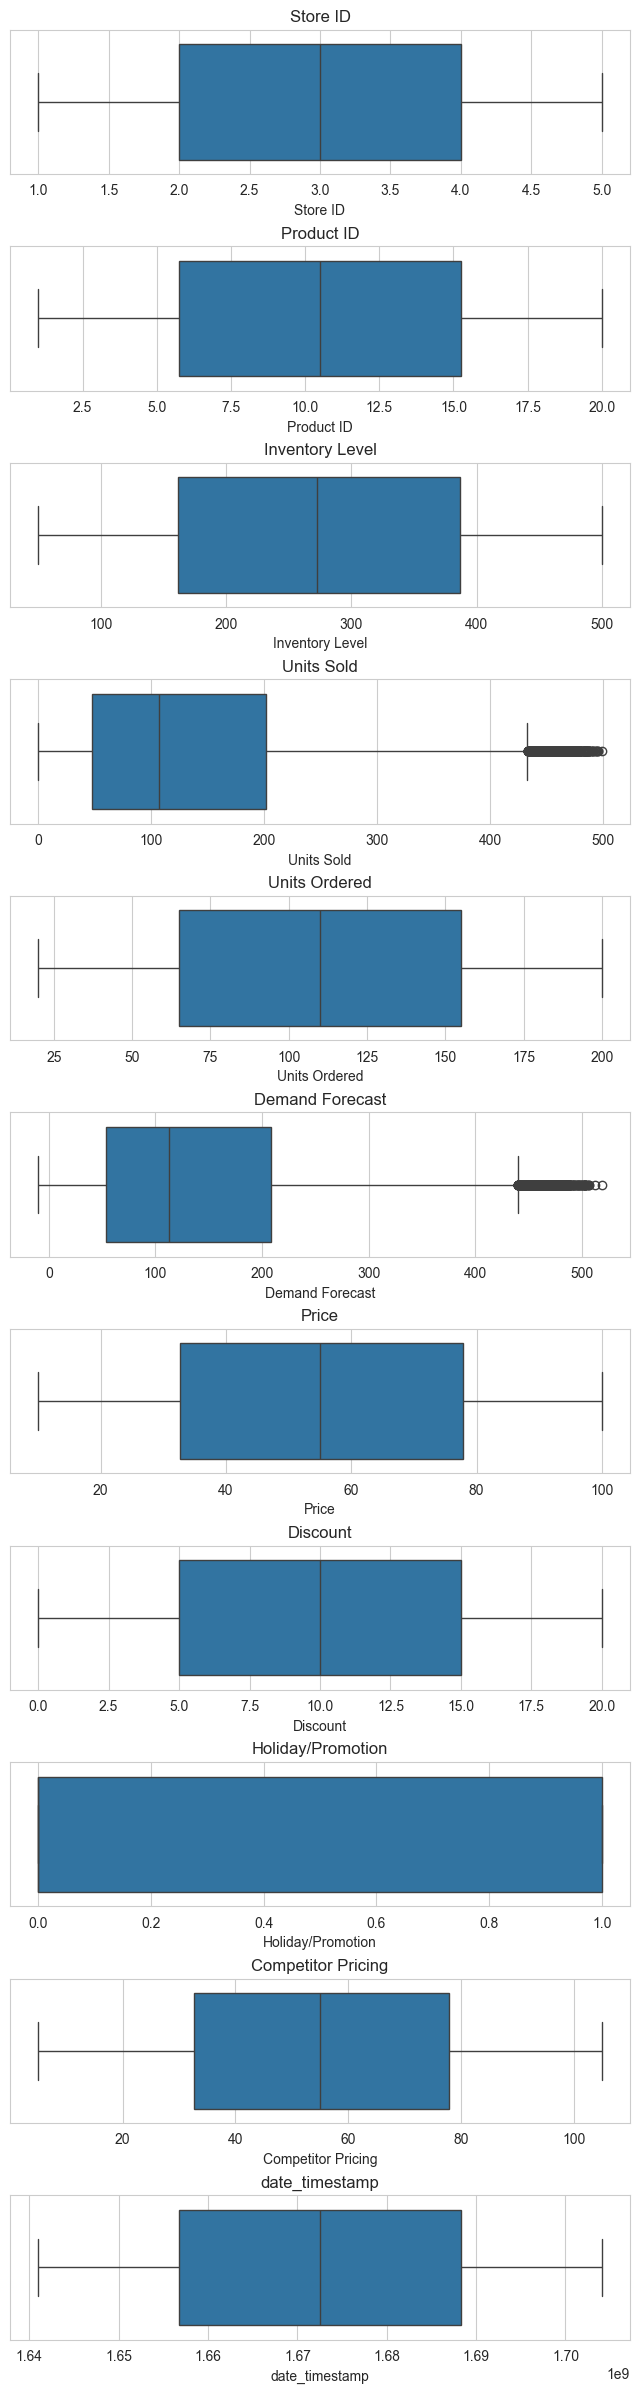

In [148]:
num_cols = len(columnas_numericas)
fig, ax = plt.subplots(nrows=num_cols, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5,wspace =0.3)

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

#### CATEGORICOS

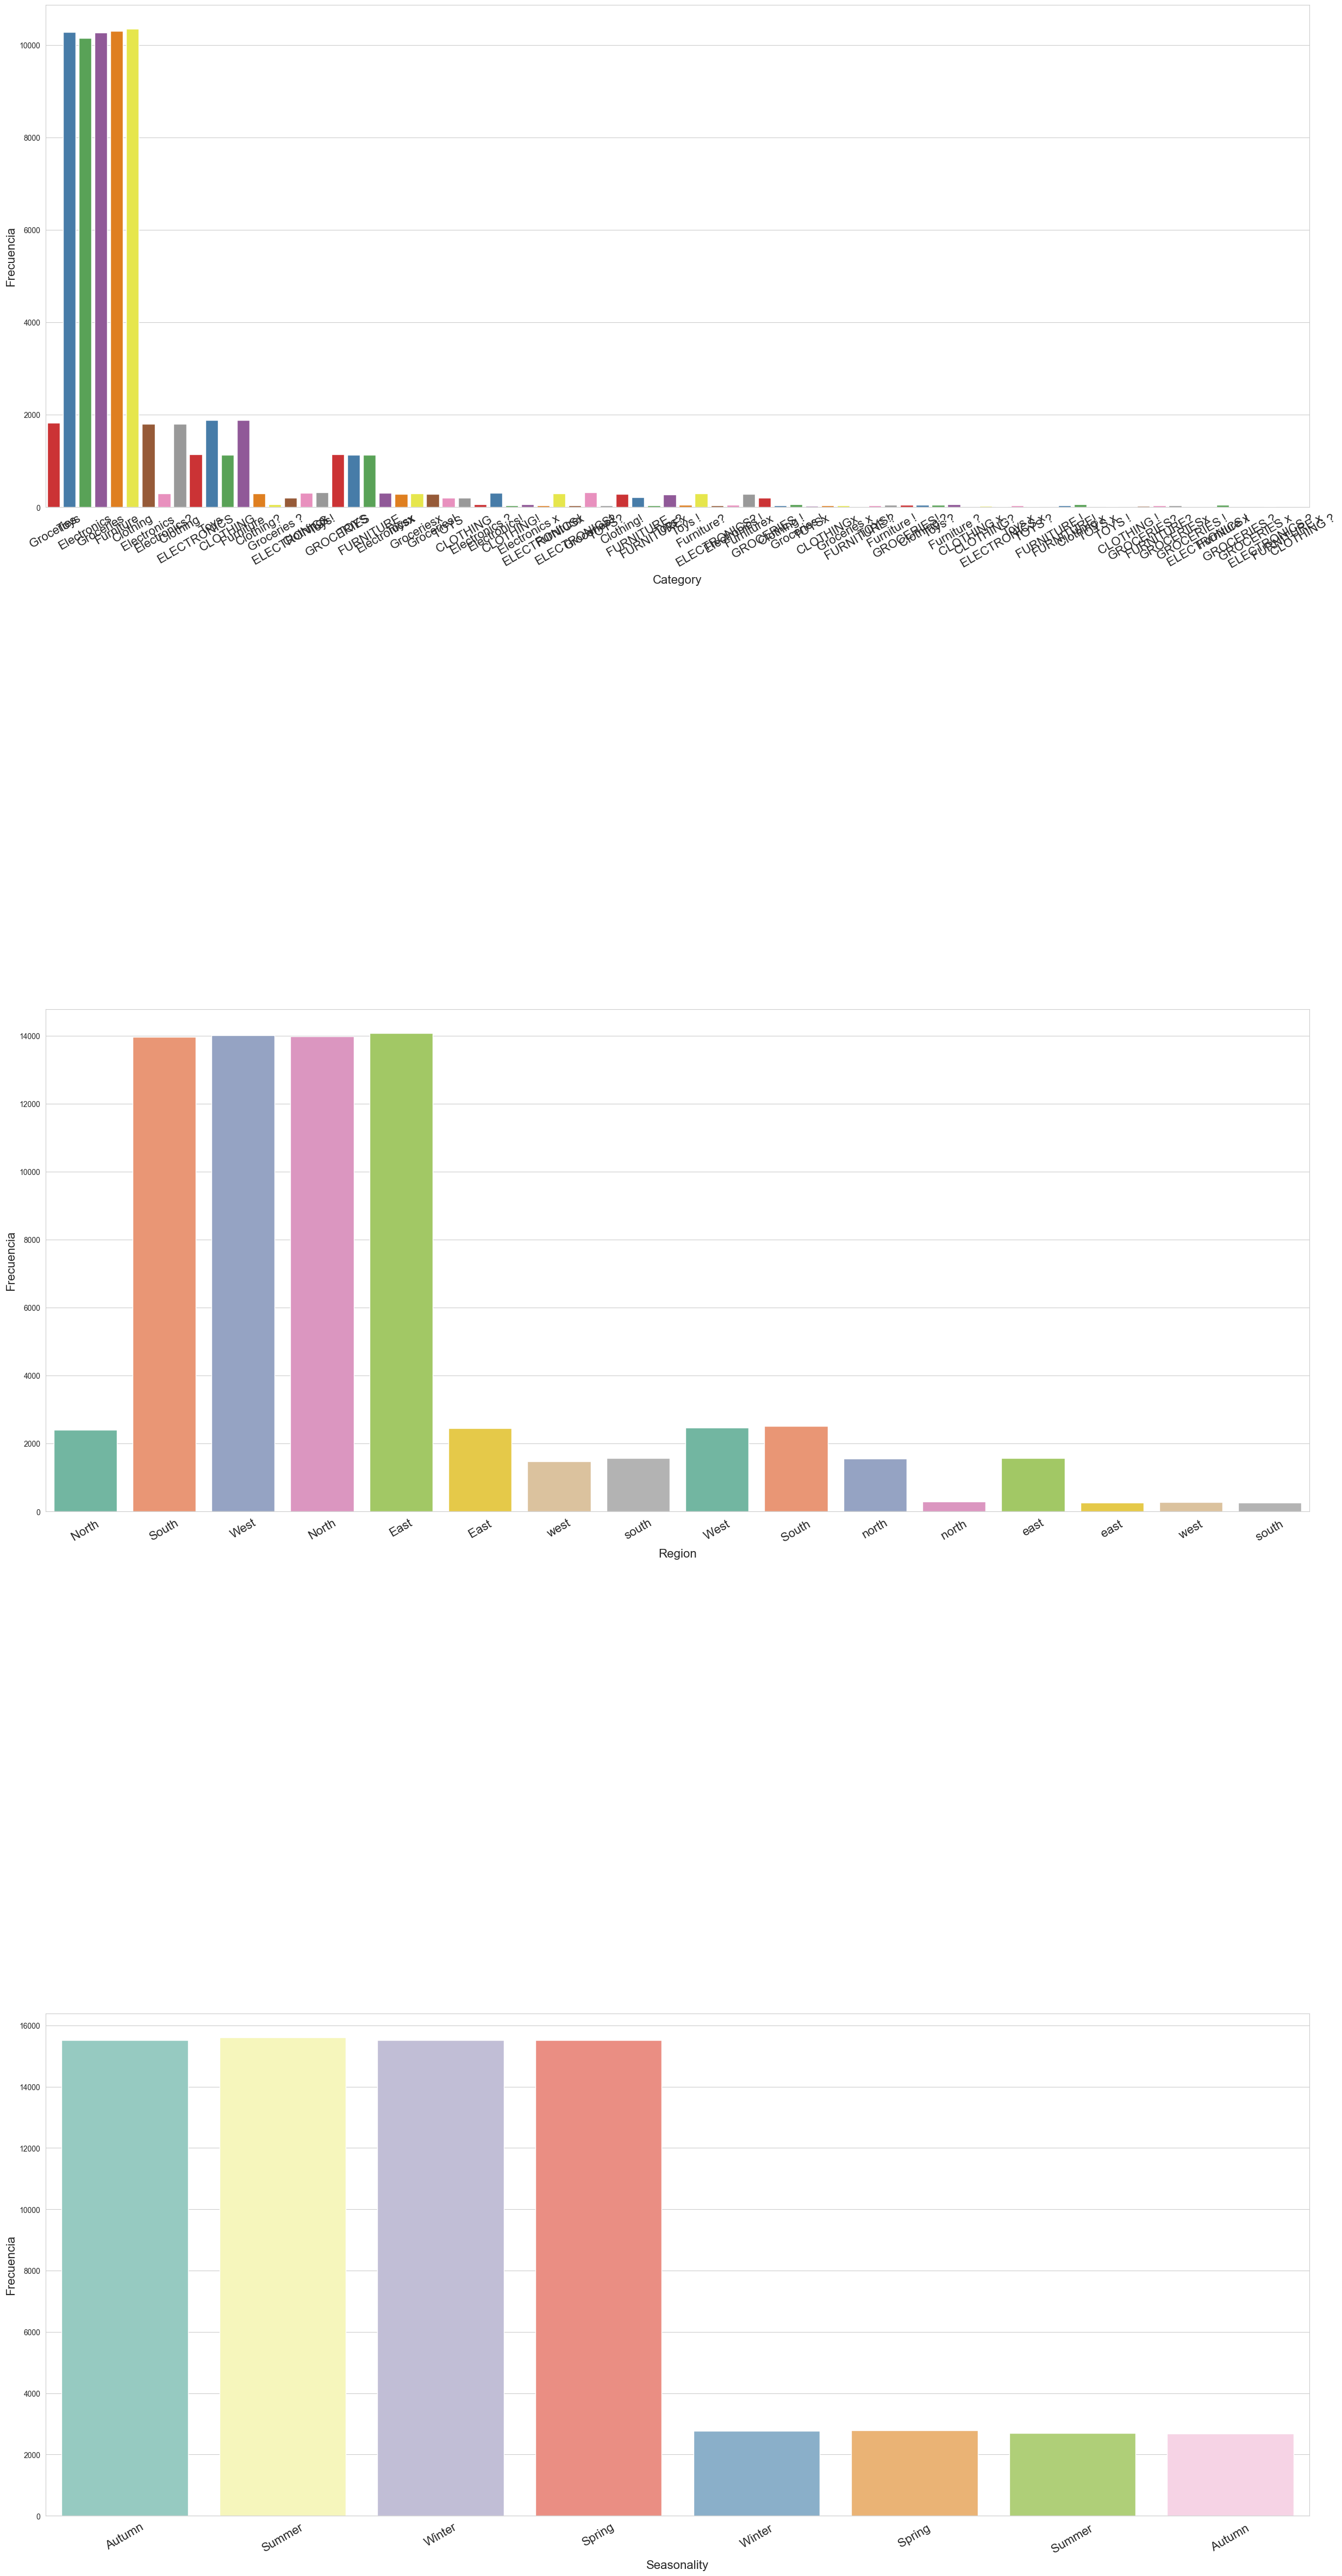

In [149]:
#Graficar los subniveles de cada variable categórica
columnas_categoricas = df.select_dtypes(include ='object').columns
paletas = ['Set1', 'Set2', 'Set3', 'pastel', 'muted', 'dark', 'colorblind', 'husl', 'coolwarm']

num_cols = len(columnas_categoricas)
fig, ax = plt.subplots(nrows=num_cols, ncols=1, figsize=(30, 60))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas_categoricas):
    palette = paletas[i % len(paletas)]

    sns.countplot(x=col, data=df, ax=ax[i], hue=col, palette=palette, legend=False)

    ticks = ax[i].get_xticks()
    labels = [label.get_text() for label in ax[i].get_xticklabels()]
    ax[i].set_xticks(ticks)
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel('Frecuencia', fontsize=16)
    ax[i].set_xticklabels(labels, rotation=30, fontsize=16)

In [150]:
for column in df.columns:
    if column in columnas_categoricas:
        df[column] = df[column].str.lower()



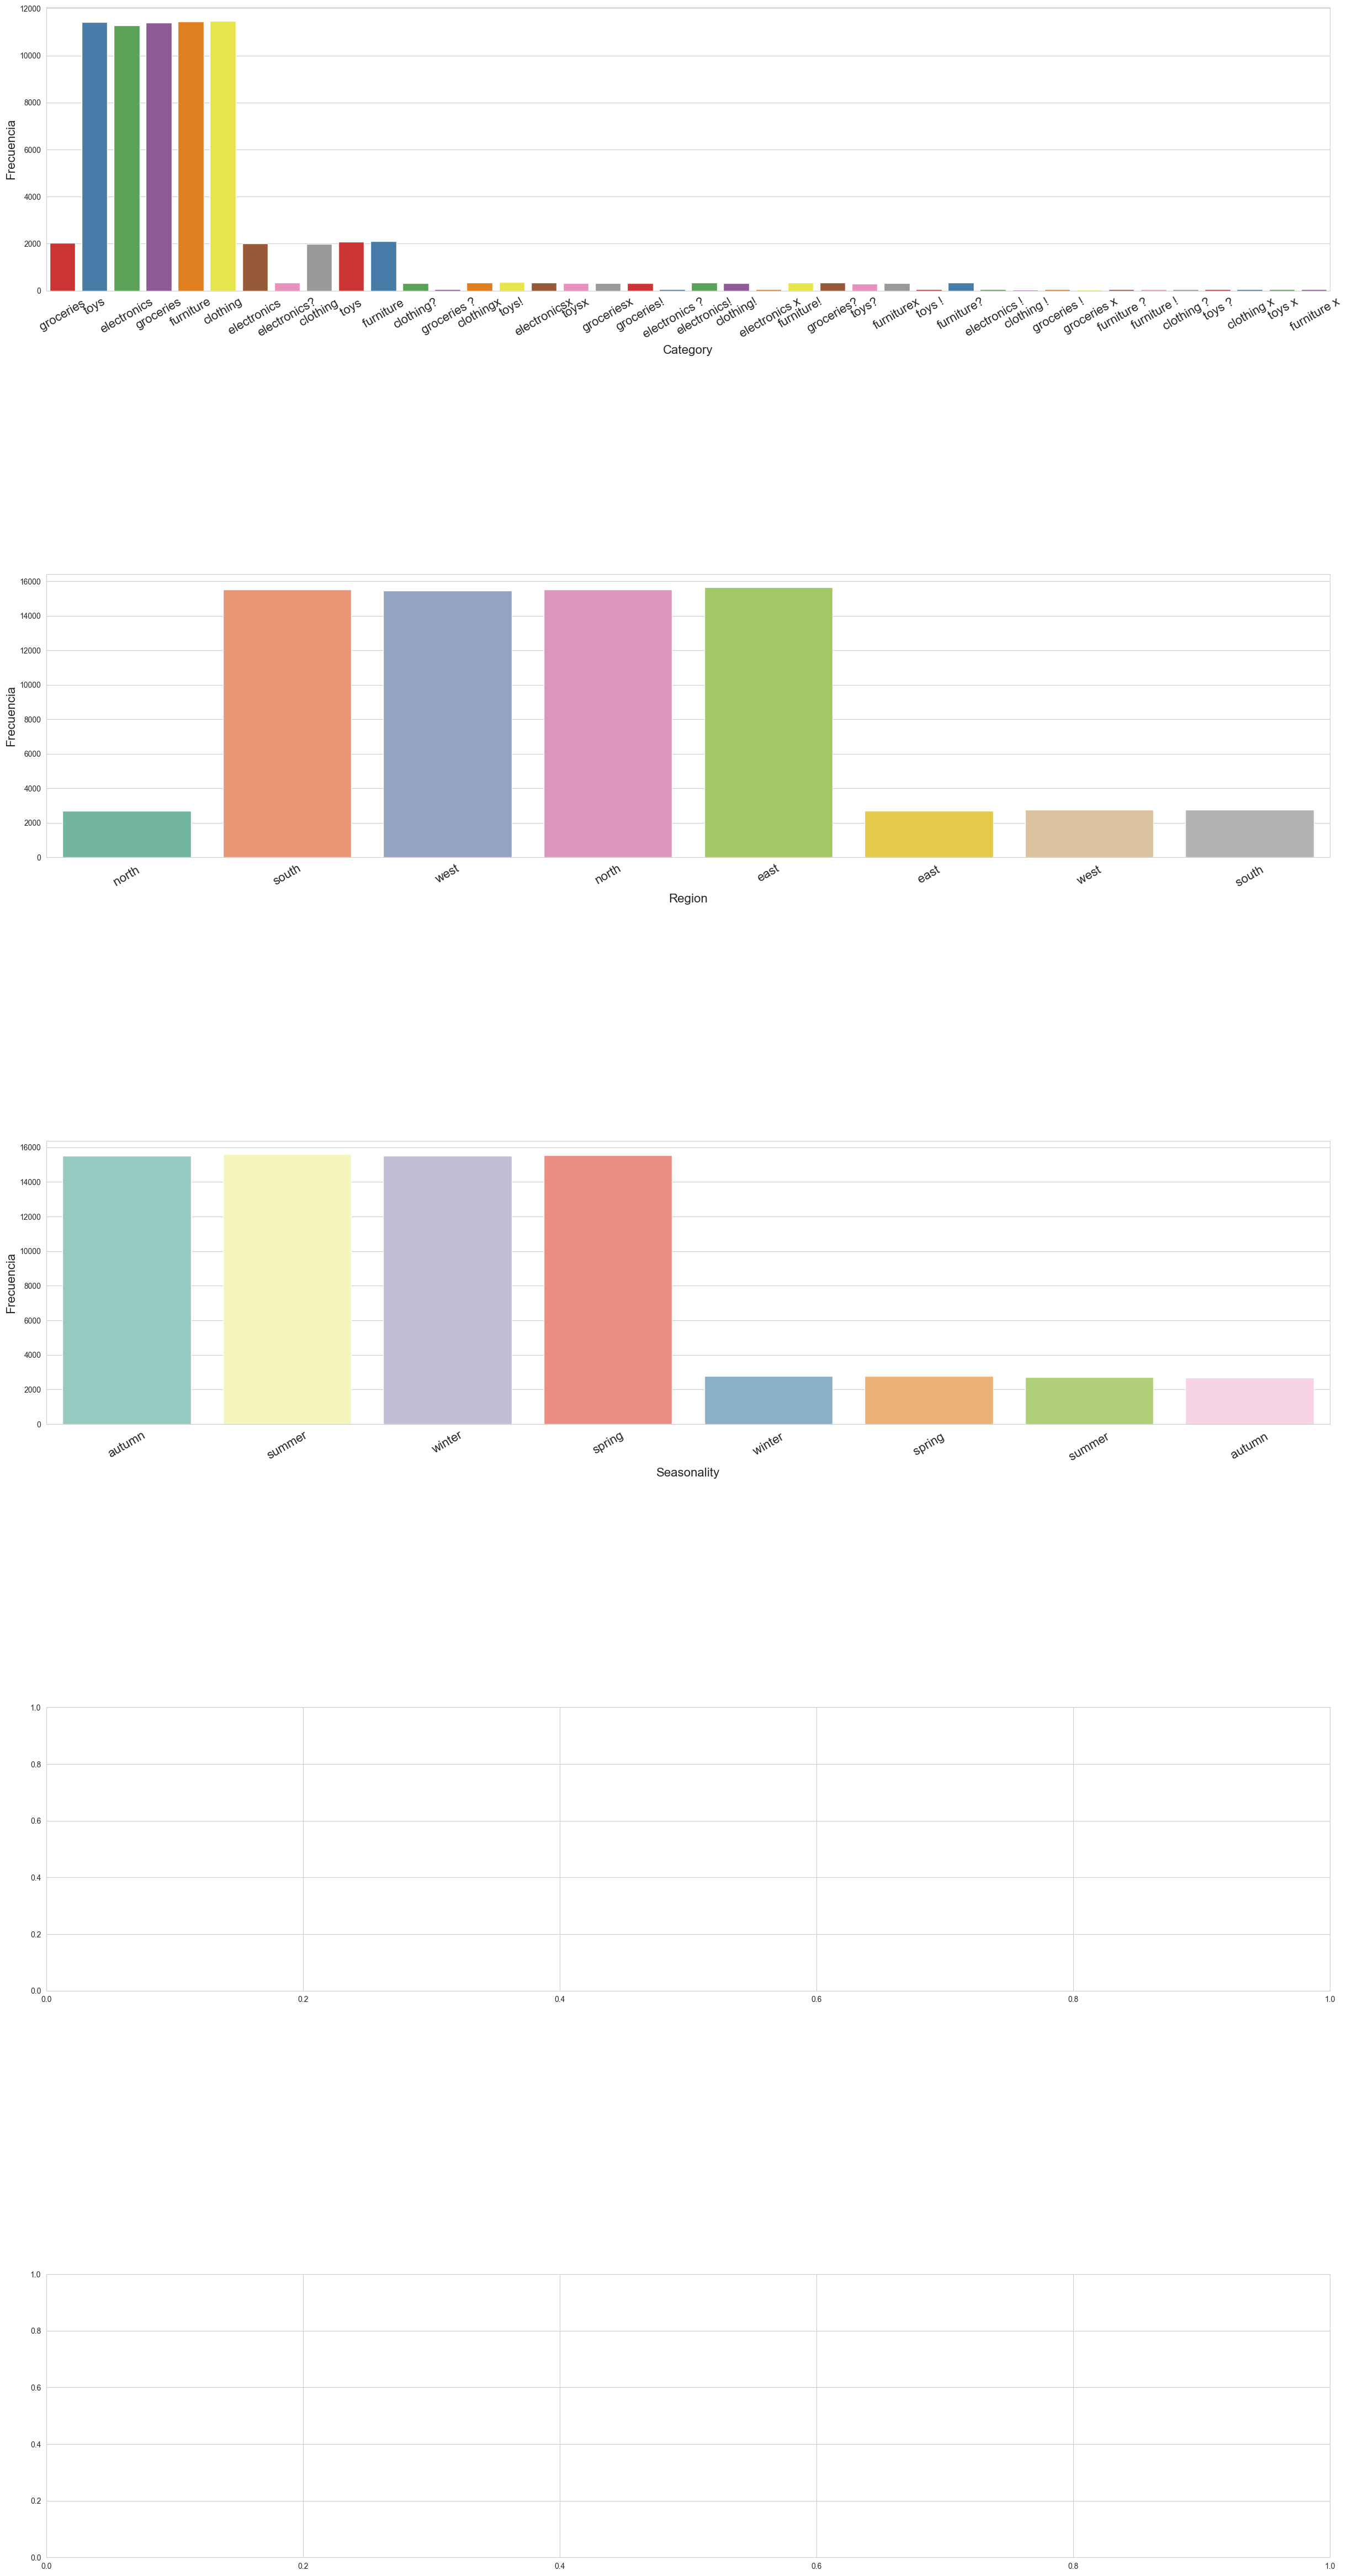

In [151]:
paletas = ['Set1', 'Set2', 'Set3', 'pastel', 'muted', 'dark', 'colorblind', 'husl', 'coolwarm']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(30, 60))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas_categoricas):
    palette = paletas[i % len(paletas)]

    sns.countplot(x=col, data=df, ax=ax[i], hue=col, palette=palette, legend=False)

    ticks = ax[i].get_xticks()
    labels = [label.get_text() for label in ax[i].get_xticklabels()]
    ax[i].set_xticks(ticks)
    ax[i].set_xlabel(col, fontsize=16)
    ax[i].set_ylabel('Frecuencia', fontsize=16)
    ax[i].set_xticklabels(labels, rotation=30, fontsize=16)

In [152]:
df['Category'] = df['Category'].str.strip().str.lower()
df['Category'] = df['Category'].str.replace(r'[^a-z]', '', regex=True)

print(df['Category'].unique())
df['Category'] = df['Category'].replace({
    'electronicsx':'electronics',
    'furniturex':'furniture',
    'clothingx':'clothing',
    'toysx':'toys',
    'groceriesx':'groceries'
})

print(df['Category'].unique())

['groceries' 'toys' 'electronics' 'furniture' 'clothing' 'clothingx'
 'electronicsx' 'toysx' 'groceriesx' 'furniturex']
['groceries' 'toys' 'electronics' 'furniture' 'clothing']


In [153]:
print(df['Region'].unique())
df['Region'] = df['Region'].str.strip()
print(df['Region'].unique())

[' north ' 'south' 'west' 'north' 'east' ' east ' ' west ' ' south ']
['north' 'south' 'west' 'east']


In [154]:
print(df['Seasonality'].unique())
df['Seasonality'] = df['Seasonality'].str.strip()
print(df['Seasonality'].unique())

['autumn' 'summer' 'winter' 'spring' ' winter ' ' spring ' ' summer '
 ' autumn ']
['autumn' 'summer' 'winter' 'spring']


In [155]:
df.shape

(73100, 14)

In [156]:
df.to_csv('retail_store_inventory_limpio.csv', index=False)

# Nombre de la columna target
target_col = 'Demand Forecast'

# Seleccionar 100 filas para producción
df_prod = df.sample(100, random_state=42)

df_prod.to_csv('retail_store_inventory_produccion_known.csv', index=False)

# Quitar la columna target del archivo de producción
df_prod = df_prod.drop(columns=[target_col])

# Guardar archivo para producción
df_prod.to_csv('retail_store_inventory_produccion_unknown.csv', index=False)

# Quitar esas 100 filas del dataset original
df_train = df.drop(df_prod.index)

# Guardar archivo para entrenamiento
df_train.to_csv('retail_store_inventory_entrenamiento.csv', index=False)
